In [1]:
from openbb import obb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
sys.path.append(r'C:\Users\avido\Documents\other code\AlgoTrading')
from utils import local_data_interface as ldi
from assets.api_credentials import openbb_pat
obb.account.login(pat=openbb_pat, remember_me=True)

import indicators as inds
from indicators import pandas_ta_indicators as pti
from indicators import tulipy_indicators as ti

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [12, 4]

In [2]:
stock_list = ldi.get_stock_list('sp500')
print(stock_list)

['AAPL', 'NVDA', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'TSLA', 'AVGO', 'BRK-B', 'WMT', 'LLY', 'JPM', 'V', 'MA', 'ORCL', 'UNH', 'COST', 'XOM', 'NFLX', 'HD', 'PG', 'JNJ', 'BAC', 'ABBV', 'CRM', 'TMUS', 'KO', 'CVX', 'PLTR', 'WFC', 'CSCO', 'ACN', 'IBM', 'PM', 'ABT', 'MS', 'GE', 'MCD', 'AXP', 'LIN', 'BX', 'ISRG', 'MRK', 'GS', 'TMO', 'NOW', 'ADBE', 'DIS', 'PEP', 'QCOM', 'T', 'AMD', 'VZ', 'CAT', 'TXN', 'UBER', 'BKNG', 'SPGI', 'INTU', 'RTX', 'C', 'AMGN', 'BSX', 'PGR', 'BLK', 'UNP', 'DHR', 'SYK', 'SCHW', 'PFE', 'LOW', 'NEE', 'TJX', 'BA', 'AMAT', 'ANET', 'CMCSA', 'HON', 'PANW', 'FI', 'DE', 'GILD', 'SBUX', 'ADP', 'KKR', 'COP', 'ETN', 'MDT', 'VRTX', 'MMC', 'PLD', 'CRWD', 'MU', 'BMY', 'NKE', 'CB', 'ADI', 'LRCX', 'ABNB', 'INTC', 'GEV', 'KLAC', 'LMT', 'CEG', 'UPS', 'ICE', 'MCO', 'SO', 'WELL', 'APO', 'WM', 'MO', 'ELV', 'PH', 'EQIX', 'SHW', 'AMT', 'CME', 'DUK', 'FTNT', 'AON', 'APH', 'CVS', 'CTAS', 'TT', 'CI', 'CDNS', 'SNPS', 'MMM', 'AJG', 'DELL', 'HCA', 'MDLZ', 'MAR', 'CMG', 'PYPL', 'COF', 'PNC', 'OR

In [4]:
stock_list = ldi.get_stock_list('sp500') #['aapl', 'GOOG', 'AMZN', 'MSFT', 'SPY', 'QQQ', 'DIA', 'IWM']

df = pd.DataFrame()
for stock in stock_list[::-1]:
    stock_df = ldi.get_local_ticker(symbol=stock, start_date="1980-01-01", end_date='2025-03-10', interval='1d') #ldi.get_ticker(symbol=stock, start_date="1980-01-01", interval='1d')
    df = pd.concat([df, stock_df], axis=0).reset_index(drop=True)
df.fillna(method='ffill', inplace=True)
print(len(df))
df.head()

4109848


C:\Users\avido\AppData\Local\Temp\ipykernel_57040\3572668497.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,open,high,low,close,volume,vwap,adj_close,unadjusted_volume,change,change_percent
0,0.52157,0.52408,0.51405,0.51405,1684892,0.51844,0.28751,1684892.0,-0.007523,-0.0144
1,0.51154,0.51154,0.49649,0.50402,373847,0.50590,0.28190,373847.0,-0.007523,-0.0147
2,0.50402,0.50652,0.49649,0.50402,4097612,0.50276,0.28190,4097612.0,0.000000,0.0000
3,0.50402,0.50402,0.49649,0.49649,2193368,0.50026,0.27770,2193368.0,-0.007523,-0.0149
4,0.49900,0.51154,0.49900,0.51154,2995944,0.50527,0.28611,2995944.0,0.012538,0.0251


### Explore correlations between condlestick patterns and future prices

In [5]:
indicators = [pti.all_candlestick_patterns()]
extractor = inds.Extractor(indicators)
indicator_df = extractor.extract(df)
indicator_df.head()

,open,high,low,close,volume,vwap,adj_close,unadjusted_volume,change,change_percent,...,CDL_SPINNINGTOP,CDL_STALLEDPATTERN,CDL_STICKSANDWICH,CDL_TAKURI,CDL_TASUKIGAP,CDL_THRUSTING,CDL_TRISTAR,CDL_UNIQUE3RIVER,CDL_UPSIDEGAP2CROWS,CDL_XSIDEGAP3METHODS
0,0.52157,0.52408,0.51405,0.51405,1684892,0.51844,0.28751,1684892.0,-0.007523,-0.0144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.51154,0.51154,0.49649,0.50402,373847,0.50590,0.28190,373847.0,-0.007523,-0.0147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50402,0.50652,0.49649,0.50402,4097612,0.50276,0.28190,4097612.0,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.50402,0.50402,0.49649,0.49649,2193368,0.50026,0.27770,2193368.0,-0.007523,-0.0149,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.49900,0.51154,0.49900,0.51154,2995944,0.50527,0.28611,2995944.0,0.012538,0.0251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Lets calculate the porportion of time a positive day follows the candlestick pattern

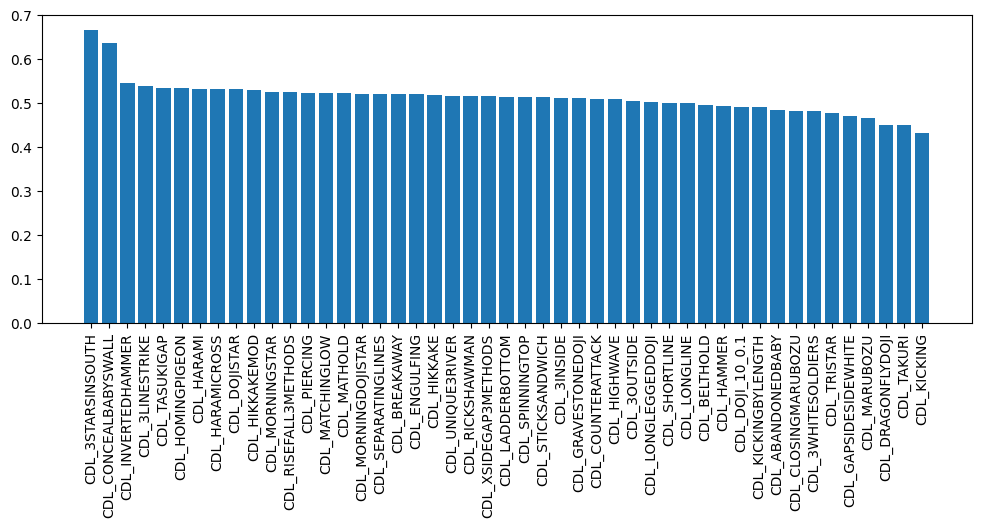

CDL_3STARSINSOUTH 0.6666666666666666 3
CDL_CONCEALBABYSWALL 0.6363636363636364 11
CDL_INVERTEDHAMMER 0.5466045691988168 47667
CDL_3LINESTRIKE 0.5389182058047494 1516
CDL_TASUKIGAP 0.535563926434744 9026
CDL_HOMINGPIGEON 0.5338638045891931 37828
CDL_HARAMI 0.532609285908227 128905
CDL_HARAMICROSS 0.5318709305398717 41621
CDL_DOJISTAR 0.5313762608425395 35393
CDL_HIKKAKEMOD 0.530949105914718 1454
CDL_MORNINGSTAR 0.526364211373699 17391
CDL_RISEFALL3METHODS 0.524822695035461 423
CDL_PIERCING 0.5237737972428023 10663
CDL_MATCHINGLOW 0.5231563603154252 56939
CDL_MATHOLD 0.5223880597014925 67
CDL_MORNINGDOJISTAR 0.5208805438653286 6178
CDL_SEPARATINGLINES 0.5207678883071554 11460
CDL_BREAKAWAY 0.5205479452054794 219
CDL_ENGULFING 0.5202674625061388 105884
CDL_HIKKAKE 0.5184886929200385 151498
CDL_UNIQUE3RIVER 0.5165262475696695 4629
CDL_RICKSHAWMAN 0.5157787250595653 370182
CDL_XSIDEGAP3METHODS 0.515465861938891 10604
CDL_LADDERBOTTOM 0.5139251523063534 4596
CDL_SPINNINGTOP 0.513923205641412

In [6]:
porportion_positive_price = []
col_names = []
occurance_counts = []

shift_n = 3

price_shifted = df['close'].shift(-1*shift_n)
indicator_df['change_percent_shifted'] = (price_shifted - df['close']) / df['close']

for col in indicator_df.columns:
    if 'CDL' in col:
        indicator_df_select = indicator_df[indicator_df[col] == 1]
        if len(indicator_df_select) > 0:
            porportion_positive_price.append(len(indicator_df_select[indicator_df_select['change_percent_shifted'] > 0]) / len(indicator_df_select))
            col_names.append(col)
            occurance_counts.append(len(indicator_df_select))

#sort
sort_idx = np.argsort(porportion_positive_price)[::-1]
porportion_positive_price = np.array(porportion_positive_price)[sort_idx]
col_names = np.array(col_names)[sort_idx]
occurance_counts = np.array(occurance_counts)[sort_idx]

#plot
plt.bar(col_names, porportion_positive_price)
plt.xticks(rotation=90)
plt.show()

#print top ten
for col, ppp, occurance in zip(col_names, porportion_positive_price, occurance_counts):
    print(col, ppp, occurance)

now do the same for those candles that have negative values as well

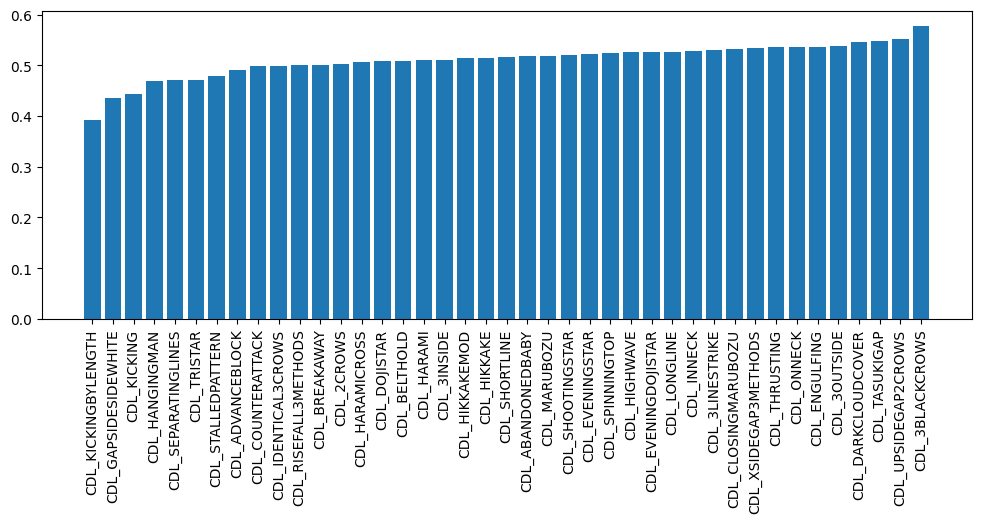

CDL_KICKINGBYLENGTH 0.391304347826087 69
CDL_GAPSIDESIDEWHITE 0.4357822133974292 9569
CDL_KICKING 0.4444444444444444 81
CDL_HANGINGMAN 0.4687321248426986 96153
CDL_SEPARATINGLINES 0.47096656976744183 27520
CDL_TRISTAR 0.4716645489199492 3935
CDL_STALLEDPATTERN 0.4782115099117981 11451
CDL_ADVANCEBLOCK 0.491222643260382 25862
CDL_COUNTERATTACK 0.4982486865148862 2284
CDL_IDENTICAL3CROWS 0.4986676817662733 2627
CDL_RISEFALL3METHODS 0.5 356
CDL_BREAKAWAY 0.5 292
CDL_2CROWS 0.5033428844317096 2094
CDL_HARAMICROSS 0.5059771497294047 41575
CDL_DOJISTAR 0.5086336091744315 46041
CDL_BELTHOLD 0.5093411171609292 381646
CDL_HARAMI 0.5111111111111111 124425
CDL_3INSIDE 0.5114973595575699 24049
CDL_HIKKAKEMOD 0.5137395459976105 1674
CDL_HIKKAKE 0.5149262322396922 165045
CDL_SHORTLINE 0.515947555392159 233923
CDL_ABANDONEDBABY 0.5178571428571429 168
CDL_MARUBOZU 0.5181452980501813 132679
CDL_SHOOTINGSTAR 0.5204971174370125 50129
CDL_EVENINGSTAR 0.5225682690137666 17724
CDL_SPINNINGTOP 0.523972444829

In [7]:
porportion_positive_price = []
col_names = []
occurance_counts = []

for col in indicator_df.columns:
    if 'CDL' in col:
        indicator_df_select = indicator_df[indicator_df[col] == -1]
        if len(indicator_df_select) > 0:
            porportion_positive_price.append(len(indicator_df_select[indicator_df_select['change_percent_shifted'] > 0]) / len(indicator_df_select))
            col_names.append(col)
            occurance_counts.append(len(indicator_df_select))

#sort
sort_idx = np.argsort(porportion_positive_price)
porportion_positive_price = np.array(porportion_positive_price)[sort_idx]
col_names = np.array(col_names)[sort_idx]
occurance_counts = np.array(occurance_counts)[sort_idx]

#plot
plt.bar(col_names, porportion_positive_price)
plt.xticks(rotation=90)
plt.show()

#print top ten
for col, ppp, occurance in zip(col_names, porportion_positive_price, occurance_counts):
    print(col, ppp, occurance)

### now try correlation between candlesticks with decay and future price

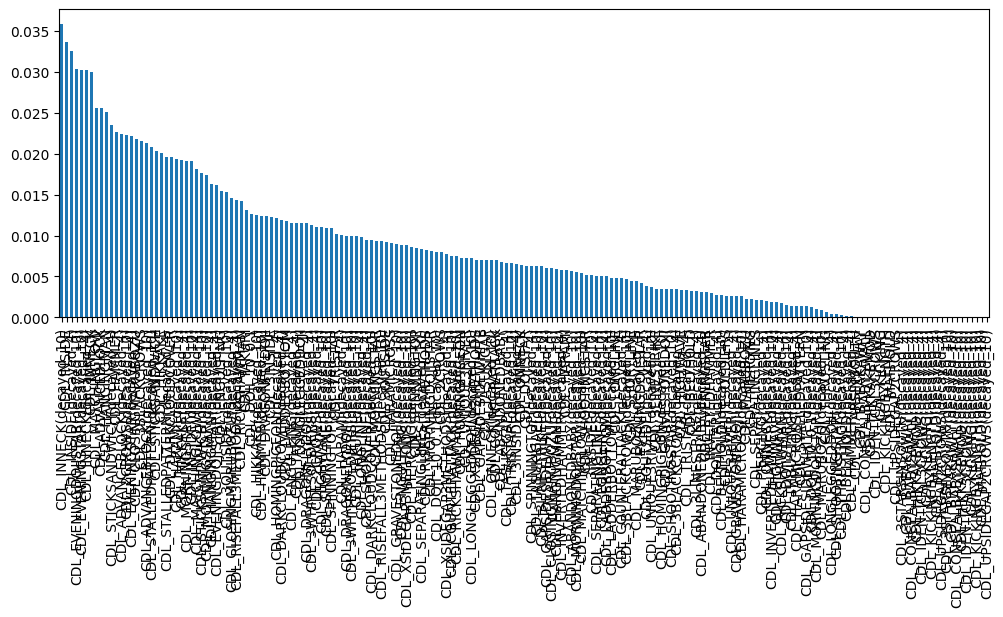

CDL_INNECK(decayed_10)             0.035849
CDL_INSIDE                         0.033691
CDL_INSIDE(decayed_4)              0.032586
CDL_EVENINGDOJISTAR(decayed_10)    0.030405
CDL_EVENINGSTAR(decayed_10)        0.030270
CDL_INNECK(decayed_4)              0.030207
CDL_INNECK                         0.029990
CDL_MATCHINGLOW                    0.025561
CDL_ADVANCEBLOCK                   0.025531
CDL_HANGINGMAN                     0.025100
Name: change_percent_shifted_1, dtype: float64

In [4]:
indicators = [pti.all_candlestick_patterns(decay_period=4), pti.all_candlestick_patterns(decay_period=10)]
extractor = inds.Extractor(indicators)
new_df = extractor.extract(df)

# correlation analsysis with next day close price
new_df['change_percent_shifted_1'] = new_df['change_percent'].shift(-1)
new_df.dropna(inplace=True)
corrs = new_df.corr()['change_percent_shifted_1'].abs().sort_values(ascending=False
            ).drop(['change_percent_shifted_1', 'change_percent', 'open', 'high', 'low', 'close', 'volume', 'vwap', 'adj_close', 'unadjusted_volume', 'change']	
            )
#plot
corrs.plot(kind='bar')
plt.show()

#print top ten
corrs.head(10)


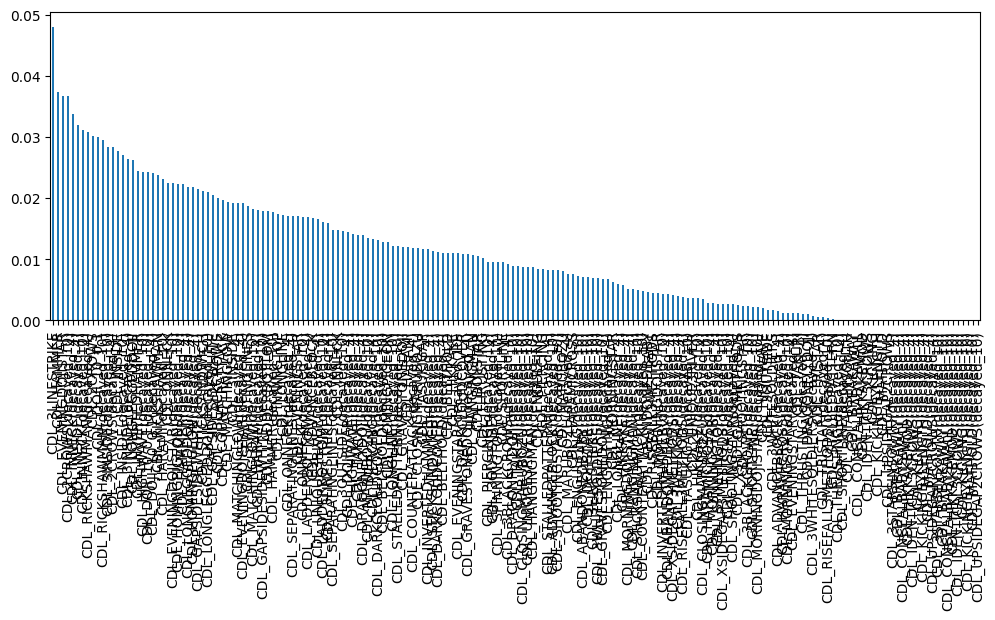

CDL_3LINESTRIKE               0.047971
CDL_HAMMER                    0.037399
CDL_EVENINGDOJISTAR           0.036733
CDL_2CROWS(decayed_10)        0.036650
CDL_INNECK(decayed_4)         0.033681
CDL_INSIDE(decayed_4)         0.031992
CDL_INNECK(decayed_10)        0.031215
CDL_RICKSHAWMAN(decayed_4)    0.030767
CDL_2CROWS                    0.030196
CDL_DOJI_10_0.1               0.030053
Name: change_percent_shifted_5, dtype: float64

In [5]:
# correlation analsysis with next week close price
new_df['change_percent_shifted_5'] = new_df['change_percent'].shift(-5)
new_df.dropna(inplace=True)
corrs = new_df.corr()['change_percent_shifted_5'].abs().sort_values(ascending=False
            ).drop(['change_percent_shifted_5', 'change_percent_shifted_1', 'change_percent', 'open', 'high', 'low', 'close', 'volume', 'vwap', 'adj_close', 'unadjusted_volume', 'change']	
            )
#plot
corrs.plot(kind='bar')
plt.show()

#print top ten
corrs.head(10)

balanced class correlation